<a href="https://colab.research.google.com/github/LizVallejos1/Examen3_354/blob/main/Ex3_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
#capa cnectada, capa de convolucion bidimensional,capa de reduccion de muestreo,drpou de regularizacion, para aplanar datos
#drpout,apaga aleatoriamente un porcentaje de neuronas

In [ ]:
def mostrar_todas_las_imagenes(digitos):
    fig, axs = plt.subplots(2, 5, figsize=(10, 5))#2filas 5 columnas
    axs = axs.flatten() #aplana la mtriz

    for i in range(10):  # Hay 10 dígitos en total (0 al 9)
        axs[i].imshow(digitos.images[i], cmap=plt.cm.gray_r)#muestra imagen del iesimo digito,escala de grises
        axs[i].set_title(f'Etiqueta: {digitos.target[i]}')

    plt.show()

In [ ]:
# Cargar el conjunto de datos de dígitos
digitos = load_digits()

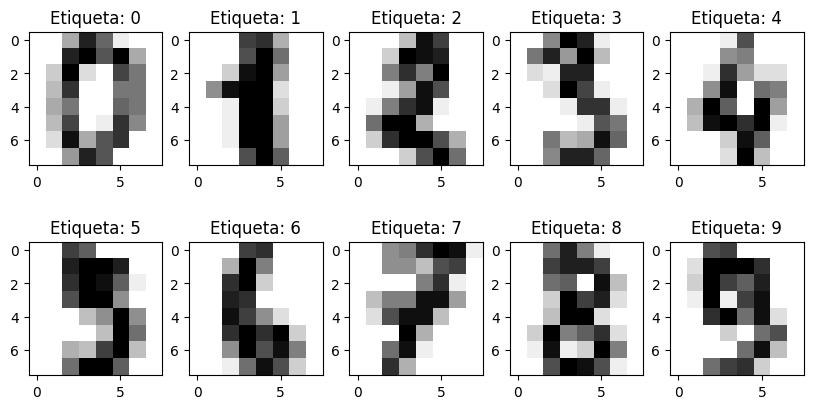

In [ ]:

# Llamar a la función para mostrar todas las imágenes
mostrar_todas_las_imagenes(digitos)

In [ ]:

# Imprimir las primeras N matrices
N = 10  # Puedes ajustar esto según sea necesario
for i in range(min(N, len(digitos.images))):
    print(f"Matriz de la imagen {i} (etiqueta: {digitos.target[i]}):")
    print(digitos.images[i])
    print("\n" + "=" * 50 + "\n")  # Separador entre imágenes

Matriz de la imagen 0 (etiqueta: 0):
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Matriz de la imagen 1 (etiqueta: 1):
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


Matriz de la imagen 2 (etiqueta: 2):
[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


Matriz de la imagen 3 (etiqueta: 3):
[[ 

In [ ]:
# ahora divido el conjunto de datos en entrenamiento y test
#el 30% se utiliza como conjunto de prueba
# el 70% se utiliza como entrenamiento
#Shuffle=true los datos se mezclaran antes de dividirlos
X_train, X_test, y_train, y_test = train_test_split(digitos.data, digitos.target, test_size=0.3, shuffle=True)

In [ ]:
# para evitar sobreajuste del modelo, subdividimos el conjjunto de entrenamiento a otro connjunto de validacion.
# esto para tener un conjunto de vaidacion aparte del de entrenamiento, para evaluar el rendimiento del modelo
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.15,shuffle=False)
#85% de datos originales en X,y_train
# 15% conjuntode validacion x,y_val
#shuffle=false para que no se mezclen los datos antes de la division, para mantener la secuencia de datos originales


In [ ]:
#CAPAS CONVOLUCIONALES
X_train = X_train.reshape(X_train.shape[0],8,8,1)#numejemplos,alto,ancho,canal1,xqes img en grises
X_val = X_val.reshape(X_val.shape[0],8,8,1)
X_test = X_test.reshape(X_test.shape[0],8,8,1)

In [ ]:
# codificando clases
y_train = to_categorical(y_train)#to_cat de Tensorflow, convert etiq en representacion one_hot encoding
y_val = to_categorical(y_val)  # en binario
y_test = to_categorical(y_test)

In [ ]:
#MODELO
model = tf.keras.Sequential()#crea modelo secuencial en TF y K, se apilan una sobre otra,de forma lineal
model.add(Conv2D(24, kernel_size=3, padding='same', activation='relu', input_shape=(8,8,1)))
#convolucion bidimensional,24 filtros,de 3x3 tam,relleno,activacio,forma
model.add(MaxPooling2D())#reduccion de muestreo
model.add(Conv2D(48, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())#convert tridimensional en bidimensional
model.add(Dense(10, activation="softmax"))#agrega capa densa con 10 neuronas
model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])
#optimizador,clasfifdor multiclase, presicion

Epoch 1/100
3/3 [==============================] - 1s 138ms/step - loss: 3.0999 - accuracy: 0.0515 - val_loss: 2.5904 - val_accuracy: 0.0899
Epoch 2/100
3/3 [==============================] - 0s 42ms/step - loss: 2.4890 - accuracy: 0.1208 - val_loss: 2.2735 - val_accuracy: 0.2169
Epoch 3/100
3/3 [==============================] - 0s 44ms/step - loss: 2.2077 - accuracy: 0.2350 - val_loss: 1.9677 - val_accuracy: 0.3439
Epoch 4/100
3/3 [==============================] - 0s 44ms/step - loss: 1.9014 - accuracy: 0.4026 - val_loss: 1.7433 - val_accuracy: 0.4974
Epoch 5/100
3/3 [==============================] - 0s 44ms/step - loss: 1.6512 - accuracy: 0.5272 - val_loss: 1.5798 - val_accuracy: 0.6032
Epoch 6/100
3/3 [==============================] - 0s 46ms/step - loss: 1.4619 - accuracy: 0.6723 - val_loss: 1.4382 - val_accuracy: 0.6878
Epoch 7/100
3/3 [==============================] - 0s 50ms/step - loss: 1.2848 - accuracy: 0.7575 - val_loss: 1.2446 - val_accuracy: 0.7143
Epoch 8/100
3/3 [==

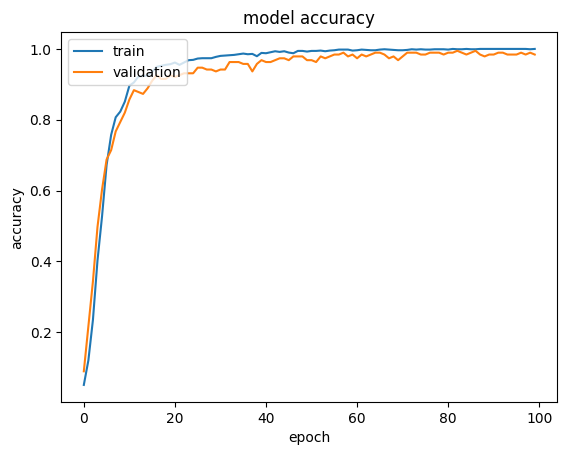

In [ ]:
# Entrenamos el modelo y visualizamos la evolucion de la presicion en el conjunto de entrenamiento y validacion
history=model.fit(X_train, y_train ,epochs=100, batch_size=512, validation_data=(X_val,y_val))
#history= 100epocas de entrenamiento,tamlote 512,conjunti de validacion
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left') #supizquierdo(cuadroetiqueta)
plt.show()

In [ ]:
#Evaluacion del modelo
results = model.evaluate(X_test,y_test)#devuelve uan lista de valores que representa las metricas
print('Resultados: ')
print(dict(zip(model.metrics_names, results)))

17/17 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9833
Resultados: 
{'loss': 0.04412362724542618, 'accuracy': 0.9833333492279053}
